In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

datos = pd.read_csv('/content/Maternal_Health_Risk_Data_Set.csv')
del datos['Unnamed: 0']
#datos.head()
#escalamos los datos
import sklearn
from sklearn.model_selection import train_test_split
scale_vars = ['Age',	'SystolicBP',	'DiastolicBP',	'BS',	'BodyTemp',	'HeartRate']
scaler = sklearn.preprocessing.StandardScaler() 
datos[scale_vars] = scaler.fit_transform(datos[scale_vars])
datos.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956,1
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088,1
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815,1
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088,1
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054,0


In [ ]:
columnas = ['Age',	'SystolicBP',	'DiastolicBP',	'BS',	'BodyTemp',	'HeartRate']

X = datos[columnas]
Y = datos["RiskLevel"]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


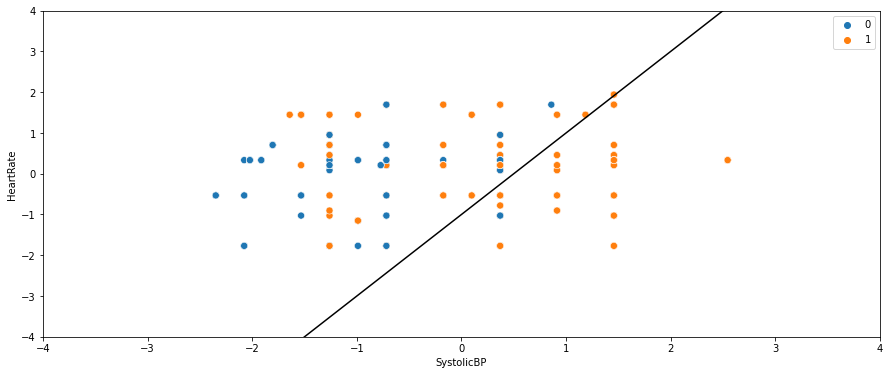

In [ ]:
  import seaborn as sns
  plt.figure(figsize=(15, 6))
  xfit = np.linspace(-9, 10)
  sns.scatterplot(datos['SystolicBP'],
                  datos['HeartRate'],
                  hue=datos['RiskLevel'].values,
                  s=50)
  for m, b in [(2, -1),]:
    plt.plot(xfit, m * xfit + b, '-k')
    plt.xlim(-4, 4);
    plt.ylim(-4, 4);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datos[['Age',	'SystolicBP']],
                                                    datos["RiskLevel"].
                                                    values,
                                                    test_size = 0.25)
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10, random_state = 42)
model.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear', random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.30      0.37       103
           1       0.62      0.78      0.69       151

    accuracy                           0.59       254
   macro avg       0.55      0.54      0.53       254
weighted avg       0.57      0.59      0.56       254



In [ ]:
##SVM metodo alternativo

# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,0.017210,0.006786,0.008750,-0.006688,0.024300,0.007971
std,1.007309,0.998860,0.992457,0.990652,1.026026,1.015375
min,-1.475511,-2.348389,-1.978576,-0.828087,-0.485215,-8.324572
25%,-0.807247,-0.717496,-0.825751,-0.554689,-0.485215,-0.532088
50%,-0.213235,0.369765,0.255023,-0.372424,-0.485215,0.210054
75%,0.752035,0.369765,0.975539,-0.220537,-0.485215,0.704815
max,2.979580,2.544289,1.696054,3.120991,3.162534,1.941717


In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7586


In [ ]:
# Aumentamos el valor de "C" a 100000 para intentar mejorar accuracy del modelo.
svc=SVC(C=100000.0) 


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8325


In [ ]:
#Para asegurarnos que no exista overfiting
# instantiate classifier with linear kernel and C=10000
linear_svc=SVC(kernel='linear', C=10000) 


# fit classifier to training set
linear_svc.fit(X_train,Y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=10000 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.6995


In [ ]:
#Comparamos la precision del conjunto test y de train para ver si hay sobre ajuste.

y_pred_train = linear_svc.predict(X_train)

y_pred_train


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)))

#No existe mucha diferencia entre la precision de ambos conjuntos de datos, son mas bien comparables

Training-set accuracy score: 0.7337


In [ ]:
#comprobamos el desajuste y sobreajuste comparando los conjuntos train y test
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, Y_test)))

Training set score: 0.7337
Test set score: 0.6995


In [ ]:
#Comparamos tambien la precision del modelo respecto a un modelo nulo, cuya frecuencia de clase es la mas frecuente

Y_test.value_counts()
#tenemos que la clase mas frecuente es 1 que es riesgo alto


1    128
0     75
Name: RiskLevel, dtype: int64

In [ ]:
# chequeamos el modelo nulo

null_accuracy = (128/(128+75))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

#la precision del modleo nulo es 0.6305 y nuestro modelo es 0.69, podriamos decir que nuestro
#modelo es aceptable prediciendo las etiquetas.

Null accuracy score: 0.6305


In [ ]:
# Para un SVM polinomial

poly_svc=SVC(kernel='poly', C=10000) 


# fit classifier to training set
poly_svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.7389


In [ ]:
#SVM con sigmoid

# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=10000) 


# fit classifier to training set
sigmoid_svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.6256


Confusion matrix

 [[48 27]
 [34 94]]

True Positives(TP) =  48

True Negatives(TN) =  94

False Positives(FP) =  27

False Negatives(FN) =  34


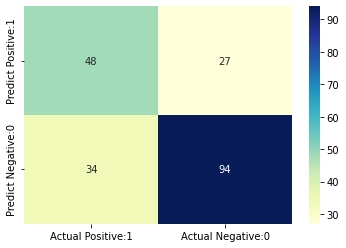

In [ ]:
#podemos crear una matriz de confusion para medir que tan bueno es el modelo
# Print the Confusion Matrix and slice it into four pieces
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Si quisieramos saber el error de nuestro modelo

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3005


In [ ]:
#calculamos la precision

precision = TP / float(TP + FP)

recall = TP / float(TP + FN)

true_positive_rate = TP / float(TP + FN)


false_positive_rate = FP / float(FP + TN)

specificity = TN / (TN + FP)


print('Specificity : {0:0.4f}'.format(specificity))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Precision : {0:0.4f}'.format(precision))

Specificity : 0.7769
False Positive Rate : 0.2231
True Positive Rate : 0.5854
Recall or Sensitivity : 0.5854
Precision : 0.6400


In [ ]:
#Si quisieramos un informe de clasificacion
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61        75
           1       0.78      0.73      0.76       128

    accuracy                           0.70       203
   macro avg       0.68      0.69      0.68       203
weighted avg       0.71      0.70      0.70       203



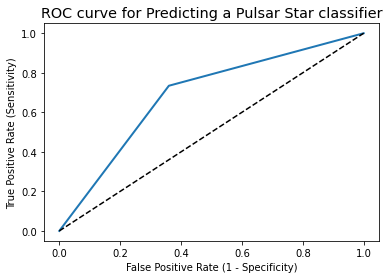

In [ ]:
#graficamos nuestros resultados para ver que tan bueno es respecto al azar
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [ ]:
#cuando tengamos un conjunto de datos desequilibrado, debemos utilizar la validacion cruzada estratificada
#Asi obtendremos datos equilibrados por un metodo aleatorio
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kfold=KFold(n_splits=10, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, Y, cv=kfold)
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.7745098  0.64705882 0.74509804 0.79411765 0.76237624 0.7029703
 0.64356436 0.72277228 0.78217822 0.69306931]


In [ ]:
#calculamos el promedio de los resultados anteriores
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.7268


In [ ]:
#Validación cruzada estratificada de k-fold con división aleatoria con kernel rbf
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, Y, cv=kfold)
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))


Stratified Cross-validation scores with rbf kernel:

[0.82352941 0.70588235 0.76470588 0.79411765 0.8019802  0.73267327
 0.74257426 0.78217822 0.8019802  0.73267327]


In [ ]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.7682


In [ ]:
#Si quisieramos comparar los modelos con distintos parametros y ver cual es el mejor
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# el mejor "score" logrado con GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# los parametros con los mejores resultados
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# Los estimadores elegidos por GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8286


Parameters that give the best results : 

 {'C': 1000, 'gamma': 0.9, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1000, gamma=0.9)


In [ ]:
#Calculamos la puntuacion de GridSearch en el conjunto de prueba
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, Y_test)))

GridSearch CV score on test set: 0.8374
